**Universidad Militar Nueva Granada**

**Ingeniería en Multimedia**

**ELECTIVA: Big Data / Ing. Marcela Mejía**

Pilar Camargo (1201656) / Andres Lindarte (1201397)

---


# **Proyecto Final: Análisis de Estadísticas de Nacidos Vivos del Hospital Manuel Uribe Ángel en Envigado, Antioquia**

In [0]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import sklearn.linear_model as lm
import datetime

In [0]:
df=pd.read_csv('nacidos.csv') #se guarda el dataset como un DF de Pandas
df.shape #para ver el tamaño(filasxcolumnas) del DF
df.describe() #Genera estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN
df.head(5) #Muestra las 5 primeras filas del DF
df.info()

(6789, 26)

,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,APGAR1,APGAR2,EDAD MADRE,EDAD PADRE
count,6789.000000,6789.000000,6789.000000,6789.000000,6787.000000,6787.000000,6789.000000,6788.000000
mean,3077.405214,48.707763,38.349241,7.767565,8.320466,9.828201,26.169981,29.435032
std,495.455056,2.657092,1.862421,2.548100,0.760620,0.593421,6.154295,8.177549
min,540.000000,28.000000,23.000000,0.000000,1.000000,1.000000,13.000000,-4.000000
25%,2820.000000,48.000000,38.000000,6.000000,8.000000,10.000000,21.000000,24.000000
50%,3110.000000,49.000000,39.000000,8.000000,8.000000,10.000000,25.000000,28.000000
75%,3390.000000,50.000000,40.000000,9.000000,9.000000,10.000000,30.000000,34.000000
max,5090.000000,58.000000,42.000000,23.000000,10.000000,10.000000,46.000000,70.000000


,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO (Gramos),TALLA (Centímetros),FECHA NACIMIENTO,PARTO ATENDIDO POR,TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,...,PERTENENCIA ÉTNICA,GRUPO INDIGENA,EDAD MADRE,RÉGIMEN SEGURIDAD,TIPO ADMINISTRADORA,NOMBRE ADMINISTRADORA,EDAD PADRE,NIVEL EDUCATIVO PADRE,DEPARTAMENTO EXPEDICIÓN,MUNICIPIO EXPEDICIÓN
0,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2610,47,01/01/2018 12:00:00 AM,MÉDICO,34,2,...,NINGUNO DE LOS ANTERIORES,NaN,19,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A-CM,20.0,BÁSICA PRIMARIA,ANTIOQUIA,ENVIGADO
1,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2200,45,01/01/2018 12:00:00 AM,MÉDICO,37,10,...,NINGUNO DE LOS ANTERIORES,NaN,20,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,30.0,BÁSICA SECUNDARIA,ANTIOQUIA,ENVIGADO
2,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2730,48,01/01/2018 12:00:00 AM,MÉDICO,38,9,...,NINGUNO DE LOS ANTERIORES,NaN,29,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,26.0,TECNOLÓGICA,ANTIOQUIA,ENVIGADO
3,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,3730,52,01/01/2018 12:00:00 AM,MÉDICO,40,9,...,NINGUNO DE LOS ANTERIORES,NaN,23,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,E.P.S. SANITAS S.A.,25.0,PROFESIONAL,ANTIOQUIA,ENVIGADO
4,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2650,47,01/01/2018 12:00:00 AM,MÉDICO,37,9,...,NINGUNO DE LOS ANTERIORES,NaN,32,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,48.0,BÁSICA SECUNDARIA,ANTIOQUIA,ENVIGADO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6789 entries, 0 to 6788
Data columns (total 26 columns):
DEPARTAMENTO                   6789 non-null object
MUNICIPIO                      6789 non-null object
AREA NACIMIENTO                6789 non-null object
SEXO                           6789 non-null object
PESO (Gramos)                  6789 non-null int64
TALLA (Centímetros)            6789 non-null int64
FECHA NACIMIENTO               6789 non-null object
PARTO ATENDIDO POR             6789 non-null object
TIEMPO DE GESTACIÓN            6789 non-null int64
NÚMERO CONSULTAS PRENATALES    6789 non-null int64
TIPO PARTO                     6789 non-null object
MULTIPLICIDAD EMBARAZO         6789 non-null object
APGAR1                         6787 non-null float64
APGAR2                         6787 non-null float64
GRUPO SANGUINEO                6778 non-null object
FACTOR RH                      6778 non-null object
PERTENENCIA ÉTNICA             6789 non-null object
GRUPO INDIG

In [0]:
df.head()

,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO (Gramos),TALLA (Centímetros),FECHA NACIMIENTO,PARTO ATENDIDO POR,TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,...,PERTENENCIA ÉTNICA,GRUPO INDIGENA,EDAD MADRE,RÉGIMEN SEGURIDAD,TIPO ADMINISTRADORA,NOMBRE ADMINISTRADORA,EDAD PADRE,NIVEL EDUCATIVO PADRE,DEPARTAMENTO EXPEDICIÓN,MUNICIPIO EXPEDICIÓN
0,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2610,47,01/01/2018 12:00:00 AM,MÉDICO,34,2,...,NINGUNO DE LOS ANTERIORES,NaN,19,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A-CM,20.0,BÁSICA PRIMARIA,ANTIOQUIA,ENVIGADO
1,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2200,45,01/01/2018 12:00:00 AM,MÉDICO,37,10,...,NINGUNO DE LOS ANTERIORES,NaN,20,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,30.0,BÁSICA SECUNDARIA,ANTIOQUIA,ENVIGADO
2,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2730,48,01/01/2018 12:00:00 AM,MÉDICO,38,9,...,NINGUNO DE LOS ANTERIORES,NaN,29,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,26.0,TECNOLÓGICA,ANTIOQUIA,ENVIGADO
3,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,3730,52,01/01/2018 12:00:00 AM,MÉDICO,40,9,...,NINGUNO DE LOS ANTERIORES,NaN,23,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,E.P.S. SANITAS S.A.,25.0,PROFESIONAL,ANTIOQUIA,ENVIGADO
4,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2650,47,01/01/2018 12:00:00 AM,MÉDICO,37,9,...,NINGUNO DE LOS ANTERIORES,NaN,32,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,48.0,BÁSICA SECUNDARIA,ANTIOQUIA,ENVIGADO


In [0]:
df=df.rename(columns = {'PESO (Gramos)':'PESO','TALLA (Centímetros)':'TALLA','TIEMPO DE GESTACIÓN':'TIEMPO GESTACION', 'NÚMERO CONSULTAS PRENATALES':'CONSULTAS PRENATALES', 'RÉGIMEN SEGURIDAD':'REGIMEN SEGURIDAD'})
df=df.rename(columns = {'DEPARTAMENTO EXPEDICIÓN':'DEPARTAMENTO EXPEDICION', 'MUNICIPIO EXPEDICIÓN':'MUNICIPIO EXPEDICION','PERTENENCIA ÉTNICA':'PERTENENCIA ETNICA'})
df.head()

,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO,TALLA,FECHA NACIMIENTO,PARTO ATENDIDO POR,TIEMPO GESTACION,CONSULTAS PRENATALES,...,PERTENENCIA ETNICA,GRUPO INDIGENA,EDAD MADRE,REGIMEN SEGURIDAD,TIPO ADMINISTRADORA,NOMBRE ADMINISTRADORA,EDAD PADRE,NIVEL EDUCATIVO PADRE,DEPARTAMENTO EXPEDICION,MUNICIPIO EXPEDICION
0,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2610,47,01/01/2018 12:00:00 AM,MÉDICO,34,2,...,NINGUNO DE LOS ANTERIORES,NaN,19,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A-CM,20.0,BÁSICA PRIMARIA,ANTIOQUIA,ENVIGADO
1,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2200,45,01/01/2018 12:00:00 AM,MÉDICO,37,10,...,NINGUNO DE LOS ANTERIORES,NaN,20,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,30.0,BÁSICA SECUNDARIA,ANTIOQUIA,ENVIGADO
2,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2730,48,01/01/2018 12:00:00 AM,MÉDICO,38,9,...,NINGUNO DE LOS ANTERIORES,NaN,29,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,26.0,TECNOLÓGICA,ANTIOQUIA,ENVIGADO
3,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,3730,52,01/01/2018 12:00:00 AM,MÉDICO,40,9,...,NINGUNO DE LOS ANTERIORES,NaN,23,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,E.P.S. SANITAS S.A.,25.0,PROFESIONAL,ANTIOQUIA,ENVIGADO
4,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2650,47,01/01/2018 12:00:00 AM,MÉDICO,37,9,...,NINGUNO DE LOS ANTERIORES,NaN,32,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,48.0,BÁSICA SECUNDARIA,ANTIOQUIA,ENVIGADO


In [0]:
df = df[np.isfinite(df['PESO'])] #Prueba los elementos para determinar la finitud (no infinito o no es un número). El resultado se devuelve como un arreglo booleano
df = df[np.isfinite(df['TALLA'])] #Esto para limpiar algunos datos NaN en estas tres columnas
df = df[np.isfinite(df['TIEMPO GESTACION'])]
df = df[np.isfinite(df['CONSULTAS PRENATALES'])] #Prueba los elementos para determinar la finitud (no infinito o no es un número). El resultado se devuelve como un arreglo booleano
df = df[np.isfinite(df['APGAR1'])] #Esto para limpiar algunos datos NaN en estas tres columnas
df = df[np.isfinite(df['APGAR2'])]
df = df[np.isfinite(df['EDAD MADRE'])] #Prueba los elementos para determinar la finitud (no infinito o no es un número). El resultado se devuelve como un arreglo booleano
df = df[np.isfinite(df['EDAD PADRE'])] #Esto para limpiar algunos datos NaN en estas tres columnas

In [0]:
df['DEPARTAMENTO'].value_counts()
df['MUNICIPIO'].value_counts()
df['AREA NACIMIENTO'].value_counts()
df['PARTO ATENDIDO POR'].value_counts()
df['PERTENENCIA ETNICA'].value_counts()
df['DEPARTAMENTO EXPEDICION'].value_counts()
df['MUNICIPIO EXPEDICION'].value_counts()

ANTIOQUIA    6786
Name: DEPARTAMENTO, dtype: int64

ENVIGADO    6786
Name: MUNICIPIO, dtype: int64

CABECERA MUNICIPAL    6786
Name: AREA NACIMIENTO, dtype: int64

MÉDICO                    6785
AUXILIAR DE ENFERMERÍA       1
Name: PARTO ATENDIDO POR, dtype: int64

NINGUNO DE LOS ANTERIORES                                      6750
NEGRO(A), MULATO(A), AFRO COLOMBIANO(A) O AFRO DESCENDIENTE      33
INDÍGENA                                                          2
ROM (GITANO)                                                      1
Name: PERTENENCIA ETNICA, dtype: int64

ANTIOQUIA    6786
Name: DEPARTAMENTO EXPEDICION, dtype: int64

ENVIGADO    6786
Name: MUNICIPIO EXPEDICION, dtype: int64

In [0]:
df=df.drop(['DEPARTAMENTO', 'MUNICIPIO', 'AREA NACIMIENTO', 'PARTO ATENDIDO POR', 'PERTENENCIA ETNICA', 'GRUPO INDIGENA', 'DEPARTAMENTO EXPEDICION', 'MUNICIPIO EXPEDICION'], axis=1)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6786 entries, 0 to 6788
Data columns (total 18 columns):
SEXO                      6786 non-null object
PESO                      6786 non-null int64
TALLA                     6786 non-null int64
FECHA NACIMIENTO          6786 non-null object
TIEMPO GESTACION          6786 non-null int64
CONSULTAS PRENATALES      6786 non-null int64
TIPO PARTO                6786 non-null object
MULTIPLICIDAD EMBARAZO    6786 non-null object
APGAR1                    6786 non-null float64
APGAR2                    6786 non-null float64
GRUPO SANGUINEO           6777 non-null object
FACTOR RH                 6777 non-null object
EDAD MADRE                6786 non-null int64
REGIMEN SEGURIDAD         6786 non-null object
TIPO ADMINISTRADORA       6233 non-null object
NOMBRE ADMINISTRADORA     6233 non-null object
EDAD PADRE                6786 non-null float64
NIVEL EDUCATIVO PADRE     6786 non-null object
dtypes: float64(3), int64(5), object(10)
memory u

In [0]:
df['APGAR1'] = df['APGAR1'].astype(int)
df['APGAR2'] = df['APGAR2'].astype(int)
df['EDAD PADRE'] = df['EDAD PADRE'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6786 entries, 0 to 6788
Data columns (total 18 columns):
SEXO                      6786 non-null object
PESO                      6786 non-null int64
TALLA                     6786 non-null int64
FECHA NACIMIENTO          6786 non-null object
TIEMPO GESTACION          6786 non-null int64
CONSULTAS PRENATALES      6786 non-null int64
TIPO PARTO                6786 non-null object
MULTIPLICIDAD EMBARAZO    6786 non-null object
APGAR1                    6786 non-null int32
APGAR2                    6786 non-null int32
GRUPO SANGUINEO           6777 non-null object
FACTOR RH                 6777 non-null object
EDAD MADRE                6786 non-null int64
REGIMEN SEGURIDAD         6786 non-null object
TIPO ADMINISTRADORA       6233 non-null object
NOMBRE ADMINISTRADORA     6233 non-null object
EDAD PADRE                6786 non-null int32
NIVEL EDUCATIVO PADRE     6786 non-null object
dtypes: int32(3), int64(5), object(10)
memory usage: 92

In [0]:
df.head()

,SEXO,PESO,TALLA,FECHA NACIMIENTO,TIEMPO GESTACION,CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,APGAR1,APGAR2,GRUPO SANGUINEO,FACTOR RH,EDAD MADRE,REGIMEN SEGURIDAD,TIPO ADMINISTRADORA,NOMBRE ADMINISTRADORA,EDAD PADRE,NIVEL EDUCATIVO PADRE
0,MASCULINO,2610,47,01/01/2018 12:00:00 AM,34,2,ESPONTÁNEO,SIMPLE,8,10,O,POSITIVO,19,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A-CM,20,BÁSICA PRIMARIA
1,MASCULINO,2200,45,01/01/2018 12:00:00 AM,37,10,ESPONTÁNEO,SIMPLE,8,10,O,POSITIVO,20,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,30,BÁSICA SECUNDARIA
2,MASCULINO,2730,48,01/01/2018 12:00:00 AM,38,9,CESÁREA,SIMPLE,8,10,A,POSITIVO,29,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,26,TECNOLÓGICA
3,MASCULINO,3730,52,01/01/2018 12:00:00 AM,40,9,CESÁREA,SIMPLE,8,10,O,POSITIVO,23,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,E.P.S. SANITAS S.A.,25,PROFESIONAL
4,MASCULINO,2650,47,01/01/2018 12:00:00 AM,37,9,ESPONTÁNEO,SIMPLE,8,10,B,POSITIVO,32,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,48,BÁSICA SECUNDARIA


In [0]:
df=df.rename(columns = {'FECHA NACIMIENTO':'FECHA_NACIMIENTO','TIEMPO GESTACION':'TIEMPO_GESTACION','CONSULTAS PRENATALES':'CONSULTAS_PRENATALES', 'TIPO PARTO':'TIPO_PARTO', 'MULTIPLICIDAD EMBARAZO':'MULTIPLICIDAD_EMBARAZO'})
df=df.rename(columns = {'GRUPO SANGUINEO':'GRUPO_SANGUINEO', 'FACTOR RH':'FACTOR_RH','EDAD MADRE':'EDAD_MADRE','REGIMEN SEGURIDAD':'REGIMEN_SEGURIDAD','TIPO ADMINISTRADORA':'TIPO_ADMINISTRADORA','EDAD PADRE':'EDAD_PADRE','NIVEL EDUCATIVO PADRE':'NIVEL_EDUCATIVO_PADRE'})
df.head()

,SEXO,PESO,TALLA,FECHA_NACIMIENTO,TIEMPO_GESTACION,CONSULTAS_PRENATALES,TIPO_PARTO,MULTIPLICIDAD_EMBARAZO,APGAR1,APGAR2,GRUPO_SANGUINEO,FACTOR_RH,EDAD_MADRE,REGIMEN_SEGURIDAD,TIPO_ADMINISTRADORA,NOMBRE ADMINISTRADORA,EDAD_PADRE,NIVEL_EDUCATIVO_PADRE
0,MASCULINO,2610,47,01/01/2018 12:00:00 AM,34,2,ESPONTÁNEO,SIMPLE,8,10,O,POSITIVO,19,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A-CM,20,BÁSICA PRIMARIA
1,MASCULINO,2200,45,01/01/2018 12:00:00 AM,37,10,ESPONTÁNEO,SIMPLE,8,10,O,POSITIVO,20,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,30,BÁSICA SECUNDARIA
2,MASCULINO,2730,48,01/01/2018 12:00:00 AM,38,9,CESÁREA,SIMPLE,8,10,A,POSITIVO,29,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,26,TECNOLÓGICA
3,MASCULINO,3730,52,01/01/2018 12:00:00 AM,40,9,CESÁREA,SIMPLE,8,10,O,POSITIVO,23,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,E.P.S. SANITAS S.A.,25,PROFESIONAL
4,MASCULINO,2650,47,01/01/2018 12:00:00 AM,37,9,ESPONTÁNEO,SIMPLE,8,10,B,POSITIVO,32,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,48,BÁSICA SECUNDARIA


In [0]:
df=df.rename(columns = {'NOMBRE ADMINISTRADORA':'NOMBRE_ADMINISTRADORA'})
df.head()

,SEXO,PESO,TALLA,FECHA_NACIMIENTO,TIEMPO_GESTACION,CONSULTAS_PRENATALES,TIPO_PARTO,MULTIPLICIDAD_EMBARAZO,APGAR1,APGAR2,GRUPO_SANGUINEO,FACTOR_RH,EDAD_MADRE,REGIMEN_SEGURIDAD,TIPO_ADMINISTRADORA,NOMBRE_ADMINISTRADORA,EDAD_PADRE,NIVEL_EDUCATIVO_PADRE
0,MASCULINO,2610,47,01/01/2018 12:00:00 AM,34,2,ESPONTÁNEO,SIMPLE,8,10,O,POSITIVO,19,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A-CM,20,BÁSICA PRIMARIA
1,MASCULINO,2200,45,01/01/2018 12:00:00 AM,37,10,ESPONTÁNEO,SIMPLE,8,10,O,POSITIVO,20,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,30,BÁSICA SECUNDARIA
2,MASCULINO,2730,48,01/01/2018 12:00:00 AM,38,9,CESÁREA,SIMPLE,8,10,A,POSITIVO,29,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,26,TECNOLÓGICA
3,MASCULINO,3730,52,01/01/2018 12:00:00 AM,40,9,CESÁREA,SIMPLE,8,10,O,POSITIVO,23,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,E.P.S. SANITAS S.A.,25,PROFESIONAL
4,MASCULINO,2650,47,01/01/2018 12:00:00 AM,37,9,ESPONTÁNEO,SIMPLE,8,10,B,POSITIVO,32,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,48,BÁSICA SECUNDARIA


In [0]:
df['DIFERENCIA_APGAR']=df['APGAR2']-df['APGAR1']
df.head(50)

,SEXO,PESO,TALLA,FECHA_NACIMIENTO,TIEMPO_GESTACION,CONSULTAS_PRENATALES,TIPO_PARTO,MULTIPLICIDAD_EMBARAZO,APGAR1,APGAR2,GRUPO_SANGUINEO,FACTOR_RH,EDAD_MADRE,REGIMEN_SEGURIDAD,TIPO_ADMINISTRADORA,NOMBRE_ADMINISTRADORA,EDAD_PADRE,NIVEL_EDUCATIVO_PADRE,DIFERENCIA_APGAR
0,MASCULINO,2610,47,01/01/2018 12:00:00 AM,34,2,ESPONTÁNEO,SIMPLE,8,10,O,POSITIVO,19,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A-CM,20,BÁSICA PRIMARIA,2
1,MASCULINO,2200,45,01/01/2018 12:00:00 AM,37,10,ESPONTÁNEO,SIMPLE,8,10,O,POSITIVO,20,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,30,BÁSICA SECUNDARIA,2
2,MASCULINO,2730,48,01/01/2018 12:00:00 AM,38,9,CESÁREA,SIMPLE,8,10,A,POSITIVO,29,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA,26,TECNOLÓGICA,2
3,MASCULINO,3730,52,01/01/2018 12:00:00 AM,40,9,CESÁREA,SIMPLE,8,10,O,POSITIVO,23,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,E.P.S. SANITAS S.A.,25,PROFESIONAL,2
4,MASCULINO,2650,47,01/01/2018 12:00:00 AM,37,9,ESPONTÁNEO,SIMPLE,8,10,B,POSITIVO,32,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,48,BÁSICA SECUNDARIA,2
5,FEMENINO,3370,48,01/01/2018 12:00:00 AM,39,9,CESÁREA,SIMPLE,8,10,A,POSITIVO,21,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,SAVIA SALUD E.P.S.,22,MEDIA ACADÉMICA O CLÁSICA,2
6,MASCULINO,2980,47,01/01/2018 12:00:00 AM,38,0,ESPONTÁNEO,SIMPLE,9,10,O,POSITIVO,21,NO ASEGURADO,NaN,NaN,32,BÁSICA SECUNDARIA,1
7,FEMENINO,3700,50,01/01/2018 12:00:00 AM,39,6,CESÁREA,SIMPLE,9,10,O,POSITIVO,21,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,NUEVA EPS SA,21,MEDIA ACADÉMICA O CLÁSICA,1
8,MASCULINO,3010,50,01/01/2018 12:00:00 AM,39,4,CESÁREA,SIMPLE,8,10,O,POSITIVO,29,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,SAVIA SALUD E.P.S.,39,PROFESIONAL,2
9,MASCULINO,3470,50,01/01/2018 12:00:00 AM,38,12,CESÁREA,SIMPLE,7,9,O,NEGATIVO,36,NO ASEGURADO,NaN,NaN,39,PROFESIONAL,2


In [0]:
df=df[['FECHA_NACIMIENTO', 'SEXO', 'PESO', 'TALLA', 'TIEMPO_GESTACION', 'CONSULTAS_PRENATALES', 'TIPO_PARTO', 'MULTIPLICIDAD_EMBARAZO', 'GRUPO_SANGUINEO', 'FACTOR_RH', 'APGAR1', 'APGAR2', 'DIFERENCIA_APGAR', 'EDAD_MADRE', 'EDAD_PADRE', 'NIVEL_EDUCATIVO_PADRE', 'REGIMEN_SEGURIDAD', 'TIPO_ADMINISTRADORA', 'NOMBRE_ADMINISTRADORA']]
df.head()

,FECHA_NACIMIENTO,SEXO,PESO,TALLA,TIEMPO_GESTACION,CONSULTAS_PRENATALES,TIPO_PARTO,MULTIPLICIDAD_EMBARAZO,GRUPO_SANGUINEO,FACTOR_RH,APGAR1,APGAR2,DIFERENCIA_APGAR,EDAD_MADRE,EDAD_PADRE,NIVEL_EDUCATIVO_PADRE,REGIMEN_SEGURIDAD,TIPO_ADMINISTRADORA,NOMBRE_ADMINISTRADORA
0,01/01/2018 12:00:00 AM,MASCULINO,2610,47,34,2,ESPONTÁNEO,SIMPLE,O,POSITIVO,8,10,2,19,20,BÁSICA PRIMARIA,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,EPS Y MEDICINA PREPAGADA SURAMERICANA S.A-CM
1,01/01/2018 12:00:00 AM,MASCULINO,2200,45,37,10,ESPONTÁNEO,SIMPLE,O,POSITIVO,8,10,2,20,30,BÁSICA SECUNDARIA,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA
2,01/01/2018 12:00:00 AM,MASCULINO,2730,48,38,9,CESÁREA,SIMPLE,A,POSITIVO,8,10,2,29,26,TECNOLÓGICA,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,EPS SURA
3,01/01/2018 12:00:00 AM,MASCULINO,3730,52,40,9,CESÁREA,SIMPLE,O,POSITIVO,8,10,2,23,25,PROFESIONAL,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,E.P.S. SANITAS S.A.
4,01/01/2018 12:00:00 AM,MASCULINO,2650,47,37,9,ESPONTÁNEO,SIMPLE,B,POSITIVO,8,10,2,32,48,BÁSICA SECUNDARIA,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD


# RESOLUCION DE PREGUNTAS

# **1. ¿Cuáles son las características promedio de la madre gestante y el recién  nacido?**

In [0]:
#¿Cuáles son las características promedio de la madre gestante y el recién nacido?
df.mean()

PESO                    3077.541114
TALLA                     48.707339
TIEMPO_GESTACION          38.348954
CONSULTAS_PRENATALES       7.767905
APGAR1                     8.320513
APGAR2                     9.828176
DIFERENCIA_APGAR           1.507663
EDAD_MADRE                26.167698
EDAD_PADRE                29.435013
dtype: float64

In [0]:
df['SEXO'].value_counts()
df['TIPO_PARTO'].value_counts()
df['MULTIPLICIDAD_EMBARAZO'].value_counts()
df['GRUPO_SANGUINEO'].value_counts()
df['FACTOR_RH'].value_counts()
df['DIFERENCIA_APGAR'].value_counts()
df['NIVEL_EDUCATIVO_PADRE'].value_counts()
df['REGIMEN_SEGURIDAD'].value_counts()
df['TIPO_ADMINISTRADORA'].value_counts()
df['NOMBRE_ADMINISTRADORA'].value_counts()

MASCULINO    3486
FEMENINO     3300
Name: SEXO, dtype: int64

ESPONTÁNEO       4392
CESÁREA          2119
INSTRUMENTADO     275
Name: TIPO_PARTO, dtype: int64

SIMPLE    6657
DOBLE      129
Name: MULTIPLICIDAD_EMBARAZO, dtype: int64

O     3937
A     2175
B      559
AB     106
Name: GRUPO_SANGUINEO, dtype: int64

POSITIVO    6295
NEGATIVO     482
Name: FACTOR_RH, dtype: int64

 2    3335
 1    3178
 0     132
 3      96
 4      23
-2       8
 5       8
-5       2
-8       2
-1       1
 6       1
Name: DIFERENCIA_APGAR, dtype: int64

MEDIA ACADÉMICA O CLÁSICA    2957
BÁSICA SECUNDARIA             807
PROFESIONAL                   702
TÉCNICA PROFESIONAL           648
BÁSICA PRIMARIA               617
SIN INFORMACIÓN               415
TECNOLÓGICA                   295
MEDIA TÉCNICA                 262
ESPECIALIZACIÓN                36
NINGUNO                        29
MAESTRÍA                       15
DOCTORADO                       2
PREESCOLAR                      1
Name: NIVEL_EDUCATIVO_PADRE, dtype: int64

CONTRIBUTIVO    4498
SUBSIDIADO      1695
NO ASEGURADO     553
EXCEPCIÓN         40
Name: REGIMEN_SEGURIDAD, dtype: int64

ENTIDAD PROMOTORA DE SALUD               4498
ENTIDAD PROMOTORA DE SALUD SUBSIDIADO    1695
ENTIDAD EXCEPTUADA DE SALUD                40
Name: TIPO_ADMINISTRADORA, dtype: int64

EPS SURA                                                                                                               2080
COOMEVA   E.P.S.  S.A.                                                                                                 1376
SAVIA SALUD E.P.S.                                                                                                     1349
NUEVA EPS SA                                                                                                            453
E.P.S.  SANITAS  S.A.                                                                                                   282
SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD                                                                             127
SAVIA SALUD E.P.S. -CM                                                                                                   80
EPS Y MEDICINA PREPAGADA SURAMERICANA S.A-CM                                                                             75
ALIANSAL

# **2. ¿Cuál es la diferencia de desempeño entre el primer y segundo test de Apgar?**

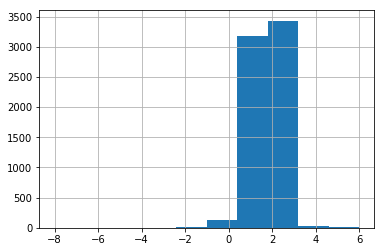

In [0]:
#¿Cuál es la diferencia de desempeño entre el primer y segundo test de Apgar?
df['DIFERENCIA_APGAR'].hist()

# **3. ¿Existe una relación entre la edad de las madres y los embarazos prematuros?**




<Figure size 1800x720 with 0 Axes>

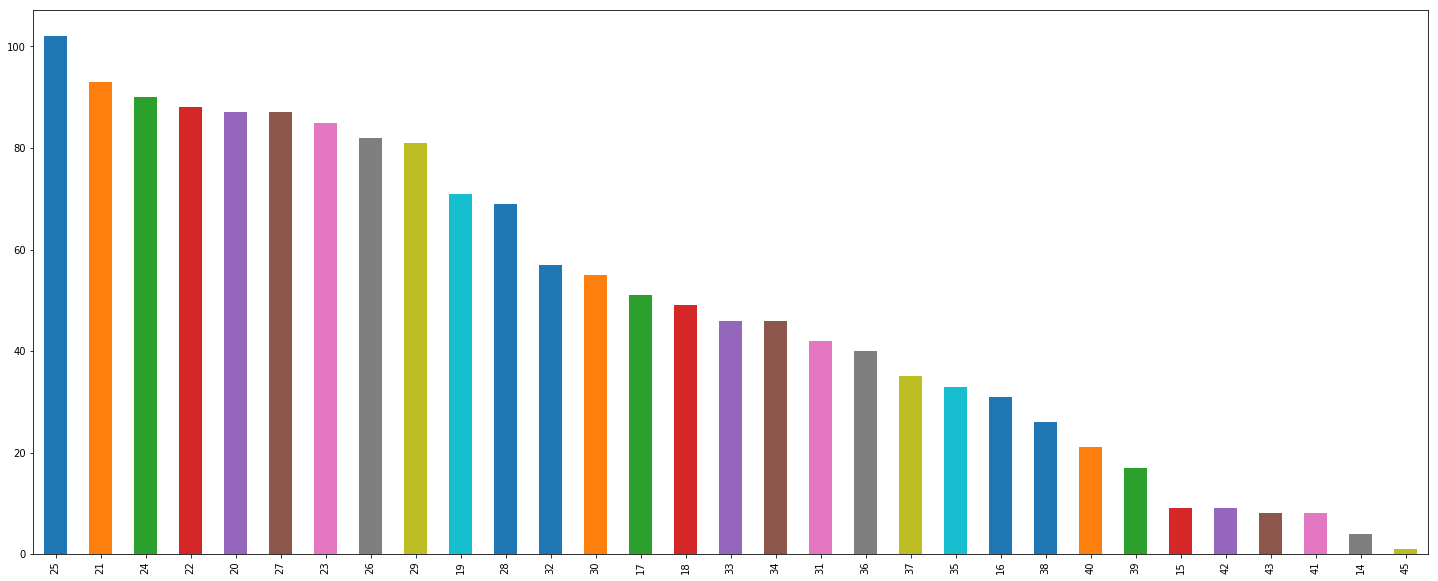

In [0]:
#¿Existe una relación entre la edad de las madres y los embarazos prematuros?

sonPrematuros = df['TIEMPO_GESTACION']<=37
edadMadre = df['EDAD_MADRE']>0

relacion = df[sonPrematuros & edadMadre]
plt.figure(figsize=(25,10))
relacion.EDAD_MADRE.value_counts().plot.bar()
plt.show()

# **4. De 200 embarazos en un mes determinado, ¿cuántos serán de madres gestantes de 21 años o menores?**

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


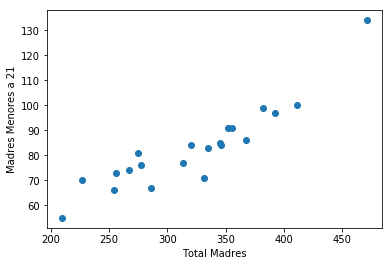

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Pendiente:  0.23290013053335476
Intercepción:  7.942872191815312


array([54.5228983])

0.8359589089188763

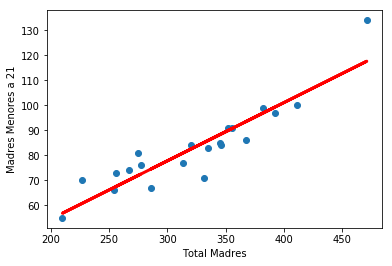

In [0]:
#¿De 200 embarazos en un mes determinado cuántos serán de madres gestantes de 21 años o menores?

dfMadresMenores = df[df['EDAD_MADRE']<=21]
#Transforma el objeto de la columna FECHA_NACIMIENTO y lo convierte a un dato de tipo datetime de pandas
dfMadresMenores['FECHA_NACIMIENTO']=pd.to_datetime(dfMadresMenores['FECHA_NACIMIENTO'])
#dfMadresMenores.shape #(1746,19)
#dfMadresMenores.tail()
dfMadresMenores = dfMadresMenores.iloc[:1744] #ignora las ultimas 2 filas(octubre 2019) por lo que el mes esta incompleto
dfMadresMenores=dfMadresMenores.set_index('FECHA_NACIMIENTO') #convierte la columna de fechas en indice
#dfMadresMenores.tail()
#dfMadresMenores.info()
#Grouper(freq='M') agrupa segun los meses en la fecha del indice
#agg= Agregación usando una o más operaciones sobre el eje especificado. 
#En este caso se agregan al grupo el conteo de tiempos de gestacion (embarazos) por mes
dfMadresMenores_porMes = dfMadresMenores.groupby(pd.Grouper(freq='M')).agg({'TIEMPO_GESTACION': 'count'})

dfMadres=df
dfMadres['FECHA_NACIMIENTO']=pd.to_datetime(dfMadres['FECHA_NACIMIENTO'])
#dfMadres.shape #(6786,19)
#dfMadres.tail()
#ignora las ultimas 14 filas(octubre 2019) por lo que el mes esta incompleto
dfMadres = dfMadres.iloc[:6772]
dfMadres=dfMadres.set_index('FECHA_NACIMIENTO')
dfMadres_PorMes= dfMadres.groupby(pd.Grouper(freq='M')).agg({'TIEMPO_GESTACION': 'count'})

#Crea un gráfico Scatter= en el que los valores de 2 variables se trazan a lo largo de 2 ejes, el patrón de los puntos resultantes revela cualquier correlación presente 
#(Datax,Datay)
#Grafo lo crea de la cantidad de embarazos general vs cantidad de menores
_=plt.scatter(dfMadres_PorMes['TIEMPO_GESTACION'],dfMadresMenores_porMes['TIEMPO_GESTACION'])
_=plt.xlabel('Total Madres')#label eje x
_=plt.ylabel('Madres Menores a 21')#label eje y
plt.show()#muestra el grafo
#newaxis=utilizado para aumentar la dimensión de la matriz existente en una dimensión más, cuando se utiliza una vez
#Al DF de cantidad de embarazos de todas las edades se le vuelve 2D con todos sus valores y se guarda en x 
x=dfMadres_PorMes.TIEMPO_GESTACION[:,np.newaxis]
#Al DF de cantidad de embarazos de menores se le toman todos sus valores en forma de serie y se guardan en y
y=dfMadresMenores_porMes['TIEMPO_GESTACION'].values
#La regresión lineal es una forma de predecir una respuesta Y sobre la base de una sola variable predictiva X
#Se supone que existe una relación lineal aproximadamente entre X e Y
lr=lm.LinearRegression() # Crear instancia de linea de regresión
lr.fit(x,y)#fit se usa para entrenar el modelo a partir de los datos x,y 
b=lr.coef_[0]#hace referencia a la pendiente de la recta resultante
a=lr.intercept_#hace referencia al punto de intercepción de la recta resultante
print('Pendiente: ',b)
print('Intercepción: ',a)
lr.predict([[200]]) # Dadas 200 madres en un mes determinado el modelo predice que podrían haber 54 menores aprox.
lr.score(x,y) # El score 0.83 dice que el modelo fue bueno, pero, siempre entre más datos se tomen, mejor la regresión
_2=plt.scatter(x,y)
#Se dibuja en rojo la recta resultante de la predicción sobre el grafo Scatter de la distribución que se tenía previamente
_2=plt.xlabel('Total Madres')
_2=plt.ylabel('Madres Menores a 21')
_2=plt.plot(x,lr.predict(x),color='red',linewidth=3)
plt.show()



# **5. ¿Se puede predecir el peso de un recién nacido según su tiempo de gestación y su talla?** 

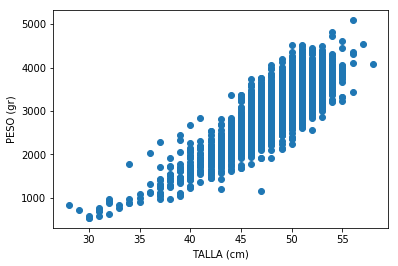

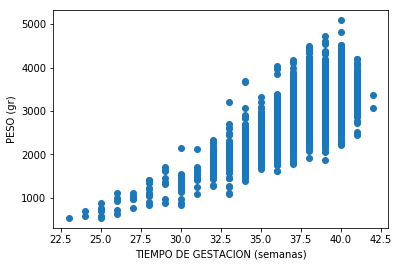

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Pendiente:  116.2127800441558
Intercepción:  -5202.7233875116735


array([2657.39729424])

0.6699870584973598

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'PESO (gr)')

Text(0.5, 0, 'TALLA (cm)')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 0, 'TIEMPO_GESTACION (semanas)')

<function matplotlib.pyplot.show(*args, **kw)>

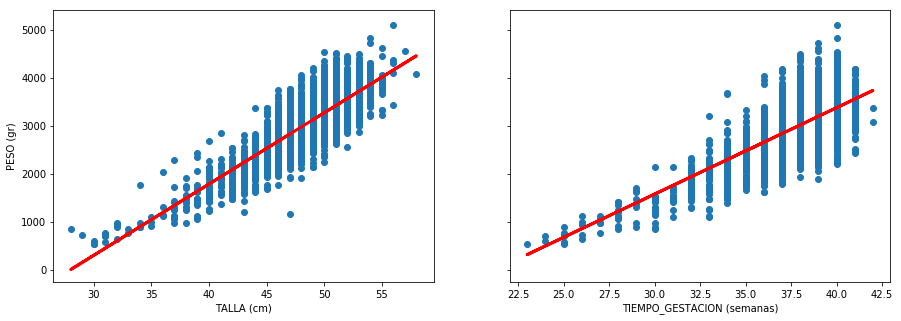

In [0]:
#¿Se puede predecir el peso de un recién nacido segùn su tiempo de gestación y su talla?

dfNacidos = df
#Crea un gráfico Scatter= en el que los valores de 2 variables se trazan a lo largo de 2 ejes, el patrón de los puntos resultantes revela cualquier correlación presente 
#(Datax,Datay)
#Grafo lo crea de la Talla de los recien nacidos vs su peso
_=plt.scatter(dfNacidos['TALLA'],dfNacidos['PESO'])
_=plt.xlabel('TALLA (cm)')#label eje x
_=plt.ylabel('PESO (gr)')#label eje y
plt.show()#muestra el grafo
#Grafo dea Tiempo de gestacion de los recien nacidos vs su peso
_2=plt.scatter(dfNacidos['TIEMPO_GESTACION'],dfNacidos['PESO'])
_2=plt.xlabel('TIEMPO DE GESTACION (semanas)')#label eje x
_2=plt.ylabel('PESO (gr)')#label eje y
plt.show()#muestra el grafo

x = dfNacidos[['TALLA','TIEMPO_GESTACION']] #2 variables independientes
y = dfNacidos['PESO'] #variable dependiente

lr=lm.LinearRegression() # Crear instancia de linea de regresión
lr.fit(x,y)#fit se usa para entrenar el modelo a partir de los datos x,y 
b=lr.coef_[0]#hace referencia a la pendiente de la recta resultante
a=lr.intercept_#hace referencia al punto de intercepción de la recta resultante
print('Pendiente: ',b)
print('Intercepción: ',a)
lr.predict([[50,30]]) # Dada una talla de 50cm y un tiempo de gestacion de 30 semanas el modelo predice que
#el recien nacido podria pesar 2657gr(2.6kg)
lr.score(x,y) # El score 0.67 dice que el modelo fue bueno, pero, siempre entre más datos se tomen, mejor la regresión

#para graficar la regresion se separan en 2 graficas la talla vs peso y el tiempo vs peso
x2=dfNacidos.TALLA[:,np.newaxis]
y2=dfNacidos['PESO'].values
x3=dfNacidos.TIEMPO_GESTACION[:,np.newaxis]
y3=dfNacidos['PESO'].values
#se crea un subplot que comparta el eje y (el peso). Graficas tipo scatter
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
ax1.scatter(x2, y2)
#se grafica la regresion a partir de la talla
lr.fit(x2,y2)
ax1.set_ylabel('PESO (gr)')
ax1.plot(x2,lr.predict(x2),color='red',linewidth=3)
ax1.set_xlabel('TALLA (cm)')
ax2.scatter(x3, y3)
#se grafica la regresion a partir del tiempo de gestacion
lr.fit(x3,y3)
ax2.plot(x3,lr.predict(x3),color='red',linewidth=3)
ax2.set_xlabel('TIEMPO_GESTACION (semanas)')

plt.show